In [1]:
from utils import showDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.spatial import distance
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy, uniform, laplace

# 1. Introduction to Gaussian Distributions

#### Gaussian distributions, also known as normal distributions, are a class of continuous probability distributions characterized by their bell-shaped curve. They are widely used in statistics and natural sciences.

In [2]:
showDisplay(1)

### **Definition**

A random variable \( X \) is said to follow a Gaussian distribution if its probability density function (PDF) is given by:

<IPython.core.display.Math object>

where:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### **Properties**

Gaussian distributions have several key properties:

- **Symmetry:** The distribution is symmetric around the mean.

- **68-95-99.7 Rule:** Approximately 68% of the data falls within one standard deviation from the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

- **Additivity:** The sum of independent Gaussian random variables is also Gaussian.

### **Applications**

Gaussian distributions are used in various fields, including:

- **Statistics:** For hypothesis testing and confidence intervals.

- **Natural and Social Sciences:** To model phenomena such as measurement errors, heights, and test scores.

- **Machine Learning:** In algorithms like Gaussian Naive Bayes and Gaussian Processes.

### Verifying Properties of the Gaussian

In [3]:
def generate_gaussian_samples(mu: float, sigma: float, N: int = 10000):
    """Generate N samples from a Gaussian distribution."""
    return np.random.normal(mu, sigma, N)

def plot_distribution(samples, label: str, color: str = "blue", bins: int = 50):
    """Plot histogram with KDE for a given sample distribution."""
    sns.histplot(samples, bins=bins, kde=True, color=color, label=label, stat="density")

### 1.a Addition Property of the Gaussian

In [4]:
showDisplay(1.1)

The sum of two independent Gaussian random variables is also Gaussian.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This property highlights the stability of the Gaussian distribution under addition.

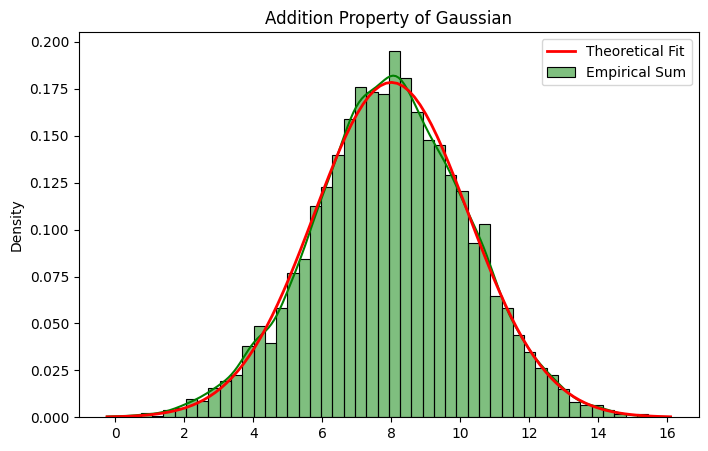

In [5]:
def verify_addition_property(mu1, sigma1, mu2, sigma2, N=10000):
    """Verify that the sum of two independent Gaussian variables is also Gaussian."""
    X1 = generate_gaussian_samples(mu1, sigma1, N)
    X2 = generate_gaussian_samples(mu2, sigma2, N)
    X_sum = X1 + X2

    # Theoretical values
    mu_sum = mu1 + mu2
    sigma_sum = np.sqrt(sigma1**2 + sigma2**2)

    # Plot
    plt.figure(figsize=(8, 5))
    plot_distribution(X_sum, "Empirical Sum", "green")
    x_vals = np.linspace(min(X_sum), max(X_sum), 100)
    plt.plot(x_vals, norm.pdf(x_vals, mu_sum, sigma_sum), 'r-', lw=2, label="Theoretical Fit")
    plt.legend()
    plt.title("Addition Property of Gaussian")
    plt.show()

verify_addition_property(mu1=5, sigma1=2, mu2=3, sigma2=1)

### 1.b Scaling Property of the Gaussian

In [6]:
showDisplay(1.2)

If a Gaussian random variable is multiplied by a constant, the result is still Gaussian.

<IPython.core.display.Math object>

This demonstrates how Gaussian distributions retain their shape under scaling transformations.

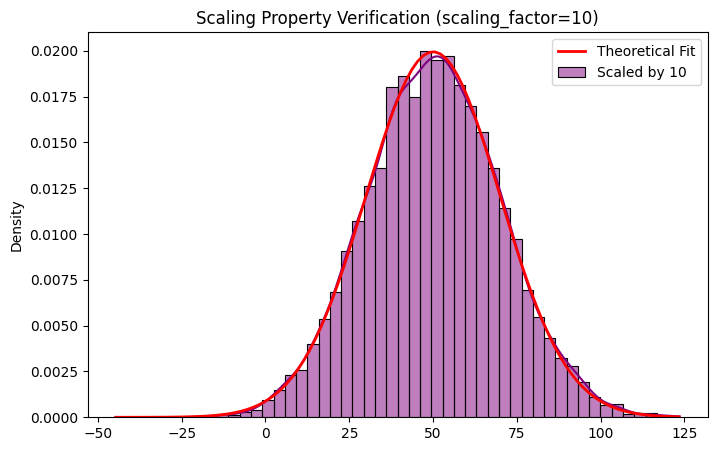

In [7]:
def verify_scaling_property(mu, sigma, scaling_factor, N=10000):
    """Verify that scaling a Gaussian variable maintains normality with scaled mean and variance."""
    X = generate_gaussian_samples(mu, sigma, N)
    X_scaled = scaling_factor * X
    # Theoretical values
    mu_scaled = scaling_factor * mu
    sigma_scaled = abs(scaling_factor) * sigma

    # Plot
    plt.figure(figsize=(8, 5))
    plot_distribution(X_scaled, f"Scaled by {scaling_factor}", "purple")
    x_vals = np.linspace(min(X_scaled), max(X_scaled), 100)
    plt.plot(x_vals, norm.pdf(x_vals, mu_scaled, sigma_scaled), 'r-', lw=2, label="Theoretical Fit")
    plt.legend()
    plt.title(f"Scaling Property Verification (scaling_factor={scaling_factor})")
    plt.show()

verify_scaling_property(mu=5, sigma=2, scaling_factor=10)

### 1.c Mean-Variance Property of the Gaussian

In [8]:
showDisplay(1.3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

This property allows for estimation and understanding of the distribution based on its mean and variance.

In [9]:
def verify_mean_variance_estimation(mu, sigma, N=10000):
    """Estimate and compare empirical mean/variance with theoretical values."""
    X = generate_gaussian_samples(mu, sigma, N)

    empirical_mean = np.mean(X)
    empirical_variance = np.var(X)

    print(f"Theoretical Mean: {mu}, Empirical Mean: {empirical_mean:.4f}")
    print(f"Theoretical Variance: {sigma**2}, Empirical Variance: {empirical_variance:.4f}")

verify_mean_variance_estimation(mu=5, sigma=2)

Theoretical Mean: 5, Empirical Mean: 5.0029
Theoretical Variance: 4, Empirical Variance: 3.9760


# 2. Gaussian Distribution Visualization

### 2.1. Create a Scatter Plot of 2-Dimensional Data

In [10]:
showDisplay(2.1)

In this section, we generate and visualize a scatter plot of 2-dimensional Gaussian data.

#### **Generating 2D Gaussian Data**

We use NumPy to generate random samples from a 2D Gaussian distribution with a specified mean and covariance matrix.

<IPython.core.display.Math object>

#### **Scatter Plot**

The scatter plot displays the generated data points, providing a visual representation of the Gaussian distribution.

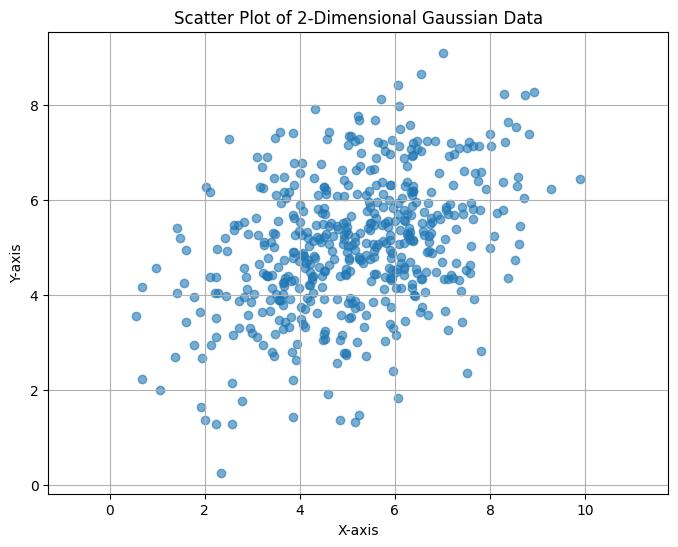

In [11]:
# Generate 2D Gaussian data
np.random.seed(0)
mean = [5, 5]
covariance = [[3, 1], [1, 2]]  # Positive definite covariance matrix
data = np.random.multivariate_normal(mean, covariance, 500)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.title("Scatter Plot of 2-Dimensional Gaussian Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.axis('equal')
plt.show()


### 2.2. Fit a Gaussian and Check Covariance Matrix

In [12]:
showDisplay(2.2)

In this section, we fit a Gaussian Mixture Model to the generated data and extract the fitted mean and covariance matrix.

#### **Fitting a Gaussian Mixture Model**

We use the `GaussianMixture` class from scikit-learn to fit a Gaussian to our data.

<IPython.core.display.Math object>

#### **Extracting Fitted Parameters**

We retrieve the fitted mean and covariance matrix from the model to analyze how well the Gaussian fits the data.

In [13]:
# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=1)
gmm.fit(data)

# Mean and covariance from the fit
fit_mean = gmm.means_[0]
fit_covariance = gmm.covariances_[0]

print("Fitted Mean:", fit_mean)
print("Fitted Covariance Matrix:\n", fit_covariance)


Fitted Mean: [5.12130606 5.04021796]
Fitted Covariance Matrix:
 [[2.84284777 0.92581785]
 [0.92581785 1.968082  ]]


### 2.3. Visualize 3-D Plot of Frequency Distribution and 2-D Gaussian Fit Surface

In [14]:
showDisplay(2.3)

In this section, we visualize the frequency distribution of the data in a 3D plot and overlay a 2D Gaussian fit surface.

#### **Creating a 3D Frequency Distribution Plot**

We construct a 3D histogram to show the density of data points in 2D space.

#### **Plotting the 2D Gaussian Fit Surface**

Using the fitted parameters, we compute the Gaussian function values over a grid and plot the fit surface.

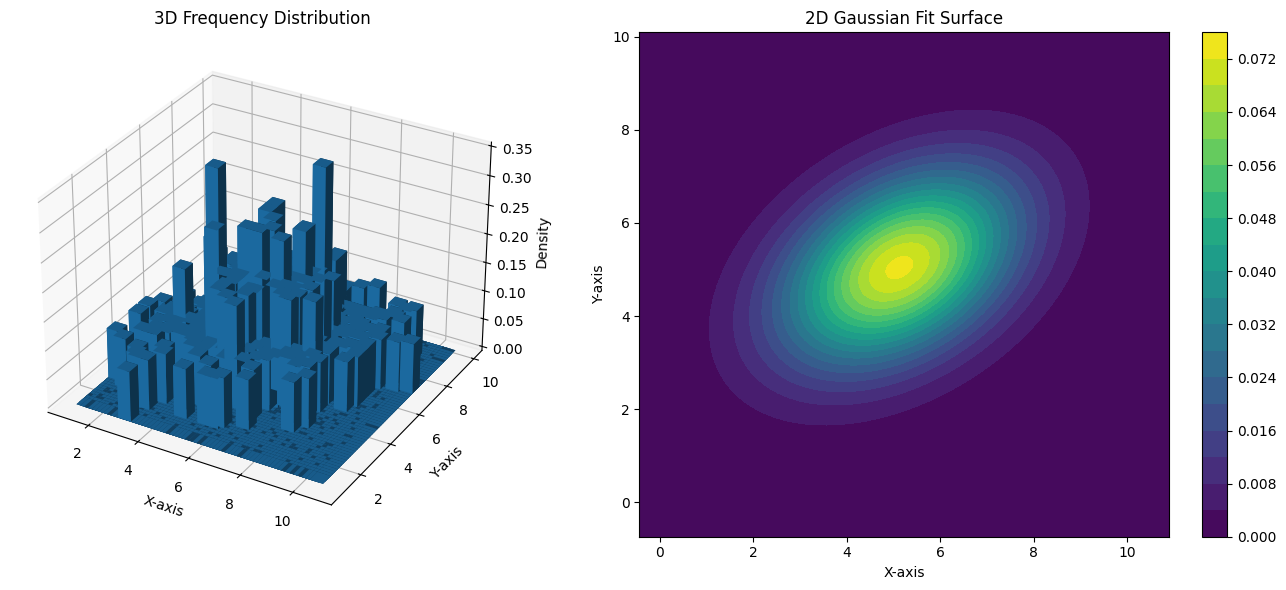

In [15]:
# Create grid points for the Gaussian surface
x = np.linspace(min(data[:, 0]) - 1, max(data[:, 0]) + 1, 100)
y = np.linspace(min(data[:, 1]) - 1, max(data[:, 1]) + 1, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian function
def gaussian_2d(x, y, mean, cov):
    pos = np.dstack((x, y))  # Combine x and y into a 2D array
    # Compute the exponent term
    rv = np.linalg.inv(cov)  # Inverse of covariance
    norm_factor = 1 / (2 * np.pi * np.sqrt(np.linalg.det(cov)))  # Normalization factor
    exponent = -0.5 * np.einsum('...k,kl,...l->...', pos - mean, rv, pos - mean)  # Correct way to calculate the exponent
    return norm_factor * np.exp(exponent)

Z = gaussian_2d(X, Y, fit_mean, fit_covariance)

# 3D plot of the frequency distribution
fig = plt.figure(figsize=(14, 6))

# 3D Frequency Distribution Plot
ax1 = fig.add_subplot(121, projection='3d')
hist, xedges, yedges = np.histogram2d(data[:, 0], data[:, 1], bins=60, density=True)

# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.5, yedges[:-1] + 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax1.set_title("3D Frequency Distribution")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Density")

# 2D Gaussian fit surface plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
ax2.set_title("2D Gaussian Fit Surface")
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")

plt.tight_layout()
plt.show()

### 2.4. Compute Sample Mean and Covariance Matrix

In [16]:
showDisplay(2.4)

In this section, we calculate the sample mean and covariance matrix from the generated data.

#### **Sample Mean Calculation**

The sample mean provides an estimate of the center of the data distribution.

<IPython.core.display.Math object>

#### **Sample Covariance Calculation**

The sample covariance matrix describes the spread of the data points around the mean.

<IPython.core.display.Math object>

In [17]:
# Sample mean and covariance calculation
sample_mean = np.mean(data, axis=0)
sample_covariance = np.cov(data, rowvar=False)
precision = 4
# Print rounded results
print("Sample Mean:", np.round(sample_mean, precision))
print("Sample Covariance Matrix:\n", np.round(sample_covariance, precision))

# Compare fitted and computed mean and covariance
covariance_difference = np.abs(sample_covariance - fit_covariance)

print("Difference in Means:", np.abs(sample_mean - fit_mean))
print("Difference in Covariances:\n", np.round(covariance_difference, precision))


Sample Mean: [5.1213 5.0402]
Sample Covariance Matrix:
 [[2.8485 0.9277]
 [0.9277 1.972 ]]
Difference in Means: [4.44089210e-15 2.66453526e-15]
Difference in Covariances:
 [[0.0057 0.0019]
 [0.0019 0.0039]]


### 2.5. Check Mahalanobis Distance of Test Points

In [18]:
showDisplay(2.5)

In this section, we compute the Mahalanobis distance for specified test points.

#### **Generating Test Points**

We create several test points to evaluate their distance from the fitted Gaussian mean.

#### **Mahalanobis Distance Calculation**

The Mahalanobis distance measures how many standard deviations away a point is from the mean of the distribution.

<IPython.core.display.Math object>

In [19]:
# Generate test points
test_points = np.array([[5, 7], [3, 4], [10, 10], [0, 0]])

# Compute Mahalanobis distance
mahalanobis_distances = []
for point in test_points:
    mahalanobis_distances.append(distance.mahalanobis(point, fit_mean, np.linalg.inv(fit_covariance)))

print("Mahalanobis Distances of Test Points:", mahalanobis_distances)

# Interpretation
for i, dist in enumerate(mahalanobis_distances):
    print(f"Distance of test point {test_points[i]} from mean: {dist}")


Mahalanobis Distances of Test Points: [np.float64(1.5503541278596609), np.float64(1.286912172617246), np.float64(3.8975457773795745), np.float64(4.006250517008503)]
Distance of test point [5 7] from mean: 1.5503541278596609
Distance of test point [3 4] from mean: 1.286912172617246
Distance of test point [10 10] from mean: 3.8975457773795745
Distance of test point [0 0] from mean: 4.006250517008503


# 3. Entropy of Different Distributions

### 3.1. Generating Different Distributions with the Same Mean & Variance

In [20]:
showDisplay(3.1)

In this section, we will generate three different distributions (Gaussian, Laplace, and Uniform) that have the same mean and variance.

<IPython.core.display.Math object>

We will generate 10,000 samples for each distribution.

In [21]:
mu, sigma = 0, 1
N = 10000

gaussian_data = np.random.normal(mu, sigma, N)
laplace_data = np.random.laplace(mu, sigma/np.sqrt(2), N)
uniform_data = np.random.uniform(mu - np.sqrt(3)*sigma, mu + np.sqrt(3)*sigma, N)

### 3.2. Compute Entropy of Each Distribution

In [22]:
showDisplay(3.2)

Entropy is a measure of the uncertainty in a probability distribution. We will compute the entropy for the Gaussian, Laplace, and Uniform distributions generated earlier.

The entropy \( H \) can be computed from the histogram of the distributions.

<IPython.core.display.Math object>

In [23]:
hist_g, _ = np.histogram(gaussian_data, bins=100, density=True)
hist_l, _ = np.histogram(laplace_data, bins=100, density=True)
hist_u, _ = np.histogram(uniform_data, bins=100, density=True)

entropy_gaussian = entropy(hist_g)
entropy_laplace = entropy(hist_l)
entropy_uniform = entropy(hist_u)

print("Entropy of Gaussian Distribution:", entropy_gaussian)
print("Entropy of Laplace Distribution:", entropy_laplace)
print("Entropy of Uniform Distribution:", entropy_uniform)

Entropy of Gaussian Distribution: 4.030635996029795
Entropy of Laplace Distribution: 3.4633209041560007
Entropy of Uniform Distribution: 4.600638501989296


### 3.3. Visualization of the Different Distributions

In [24]:
showDisplay(3.3)

We will visualize the Gaussian, Laplace, and Uniform distributions along with their probability density functions (PDFs) to compare them.

This will help us understand how different distributions can have the same mean and variance but behave differently.

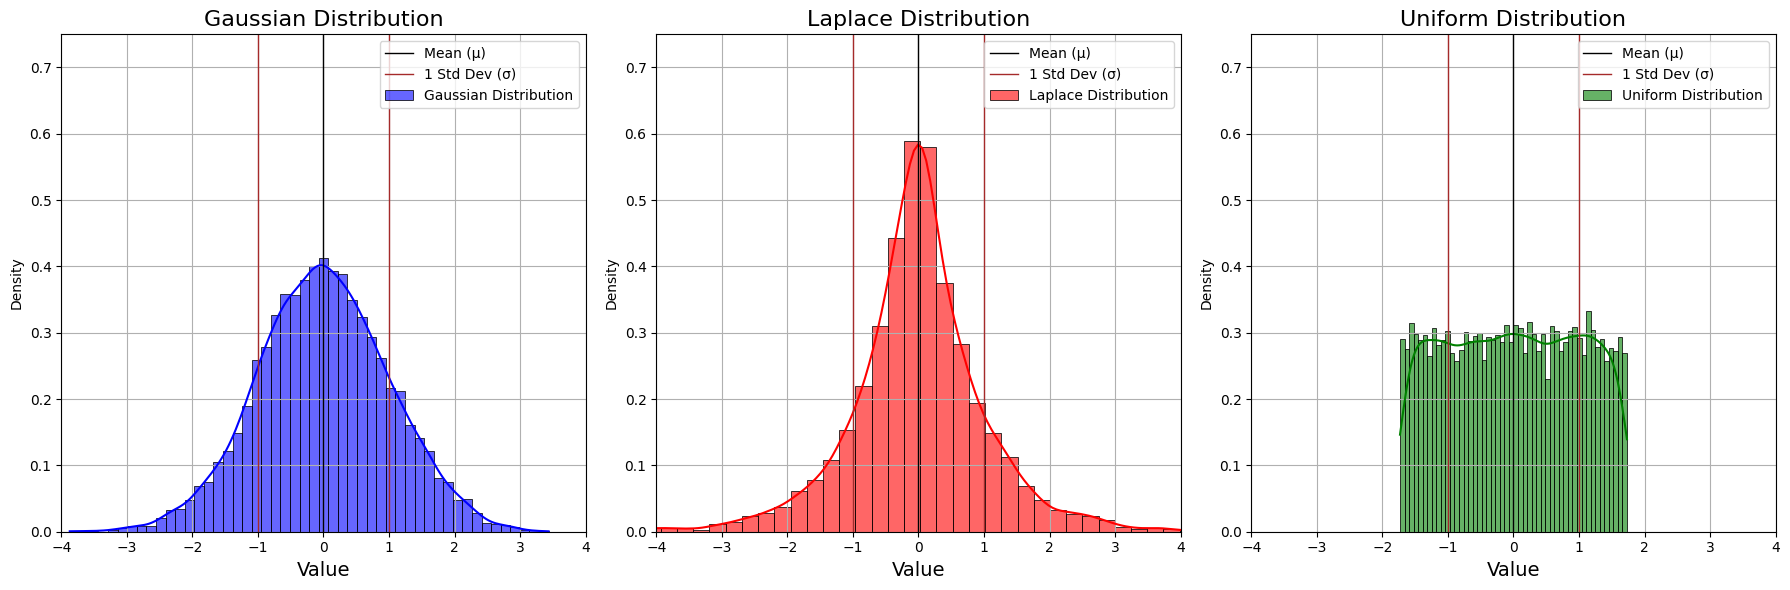

In [25]:
# Function to plot distributions
def plot_distribution(ax, data, color, title, mu, sigma, x_min, x_max, y_min, y_max, line_colors):
    sns.histplot(data, bins=50, kde=True, color=color, label=title, stat="density", alpha=0.6, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Value", fontsize=14)

    # Draw lines with specified colors
    ax.axvline(mu, color=line_colors['mean'],  linewidth=1, label='Mean (μ)')
    ax.axvline(mu + sigma, color=line_colors['std_dev'],  linewidth=1, label='1 Std Dev (σ)')
    ax.axvline(mu - sigma, color=line_colors['std_dev'],  linewidth=1)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid()

# Set up the figure
plt.figure(figsize=(18, 6))
x_min, x_max, y_min, y_max = -4, 4, 0, 0.75

# Define line colors
line_colors = {
    'mean': 'black',
    'std_dev': 'brown'
}

# Gaussian Distribution
ax1 = plt.subplot(1, 3, 1)
plot_distribution(ax1, gaussian_data, "blue", "Gaussian Distribution", mu, sigma, x_min, x_max, y_min, y_max, line_colors)

# Laplace Distribution
ax2 = plt.subplot(1, 3, 2)
plot_distribution(ax2, laplace_data, "red", "Laplace Distribution", mu, sigma, x_min, x_max, y_min, y_max, line_colors)

# Uniform Distribution
ax3 = plt.subplot(1, 3, 3)
plot_distribution(ax3, uniform_data, "green", "Uniform Distribution", mu, sigma, x_min, x_max, y_min, y_max, line_colors)

plt.tight_layout()
plt.show()


# 4. Descriptive Plots

### 4.1. Descriptive Plots

In [26]:
showDisplay(4.1)

In this section, we will generate various datasets, including:

- **Thin-tailed distribution:**

  - **Normal Distribution:**

<IPython.core.display.Math object>

- **Thick-tailed distribution:**

  - **t-Distribution:**

<IPython.core.display.Math object>

- **Categorical data:**

  - Random counts across categories \( C = \{A, B, C, D\} \).

Understanding these distributions helps in identifying data characteristics and patterns.

In [27]:
np.random.seed(0)

# Generate thin-tailed and thick-tailed distributions
thin_tailed_data = np.random.normal(loc=0, scale=1, size=1000)  # Normal Distribution
thick_tailed_data = np.random.standard_t(df=3, size=1000)  # t-distribution with df=3 (thick-tailed)

# Generate categorical data
categories = ['A', 'B', 'C', 'D']
values = [np.random.randint(50, 100) for _ in categories]
categorical_data = pd.DataFrame({'Category': categories, 'Values': values})

### 4.2. Box Plots

In [28]:
showDisplay(4.2)

- **Purpose:** Visualize median, quartiles, and outliers.

- **Five-number summary:**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- **Outliers:** Points outside:

<IPython.core.display.Math object>

where \( \text{IQR} = Q_3 - Q_1 \).

Box plots are crucial for comparative analysis of thin-tailed and thick-tailed datasets.

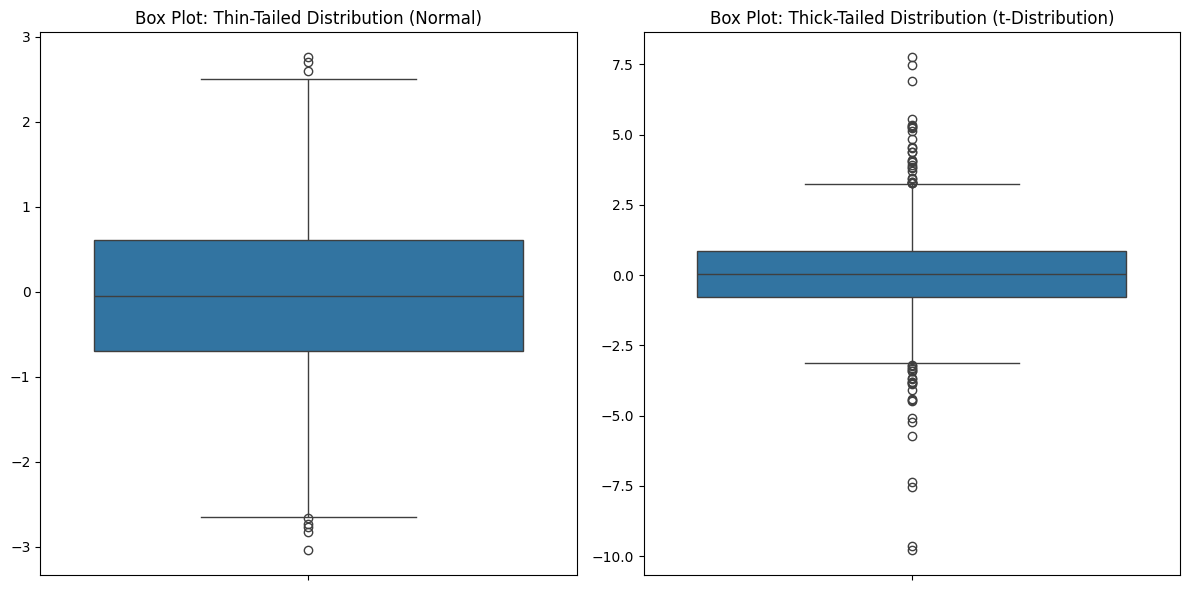

In [29]:
# Box plot for thin-tailed vs thick-tailed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=thin_tailed_data)
plt.title("Box Plot: Thin-Tailed Distribution (Normal)")

plt.subplot(1, 2, 2)
sns.boxplot(data=thick_tailed_data)
plt.title("Box Plot: Thick-Tailed Distribution (t-Distribution)")

plt.tight_layout()
plt.show()

### 4.3. Frequency Plots and Histograms

In [30]:
showDisplay(4.3)

- **Histograms:** Show frequency of data within specified bins:

<IPython.core.display.Math object>

- **KDE (Kernel Density Estimate):** Smooth representation of the distribution:

<IPython.core.display.Math object>

where \(K\) is the kernel function and \(h\) is the bandwidth.

Key insights:

- **Thin-tailed:** Sharp peak around the mean.

- **Thick-tailed:** Flatter peak, indicating more spread and potential outliers.

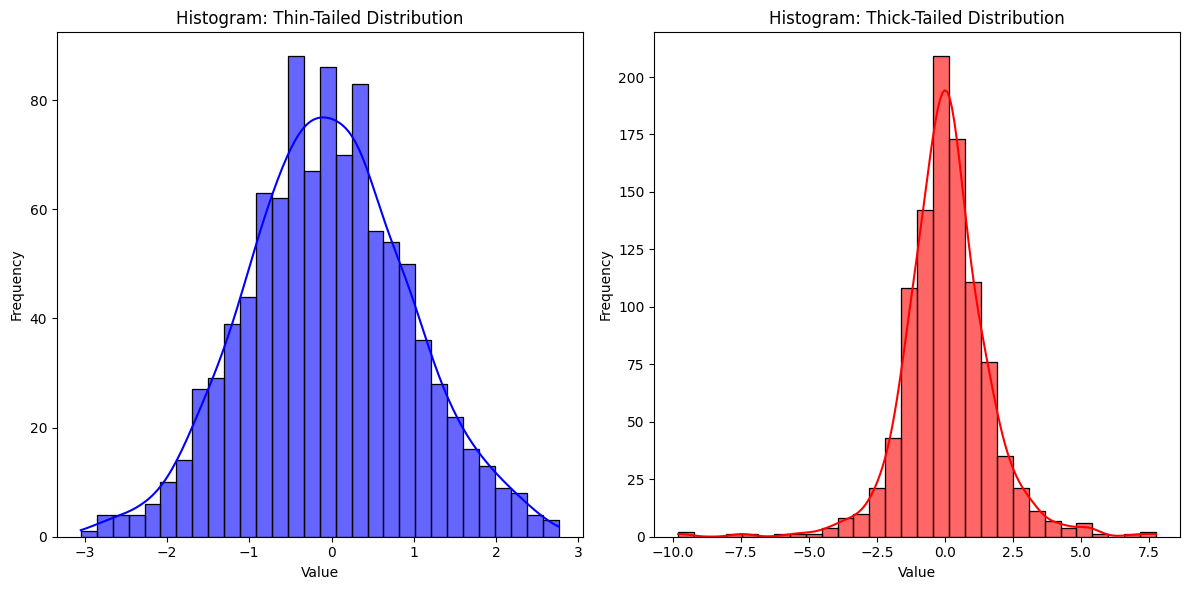

In [31]:
# Frequency plots and histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(thin_tailed_data, bins=30, kde=True, color='blue', label='Normal', alpha=0.6)
plt.title("Histogram: Thin-Tailed Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(thick_tailed_data, bins=30, kde=True, color='red', label='t-Distribution', alpha=0.6)
plt.title("Histogram: Thick-Tailed Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 4.4. Bar Charts for Categorical Data

In [32]:
showDisplay(4.4)

- **Purpose:** Compare different categories visually.

- **Representation:** Each bar's height corresponds to the count of occurrences.

- **Mean Value Calculation:**

<IPython.core.display.Math object>

where \(y_i\) is the value for category \(i\).

Useful for identifying trends and patterns across categories.

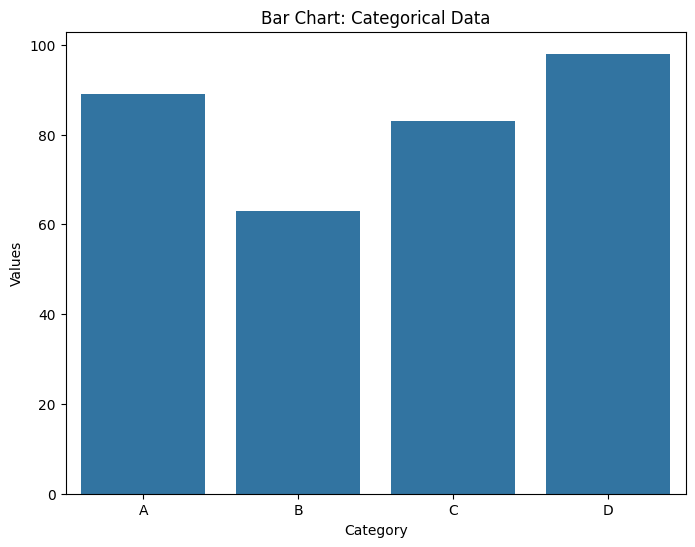

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Values', data=categorical_data)
plt.title("Bar Chart: Categorical Data")
plt.xlabel("Category")
plt.ylabel("Values")
plt.show()

### 4.5. Identifying Outliers

In [34]:
showDisplay(4.5)

- **Outliers:** Values significantly different from others, defined as:

  - For box plots: Any value \(x\) where:

<IPython.core.display.Math object>

- **Impact:** Can skew results in statistical analysis.

Detection methods:

- **Box plots:** Mark points outside whiskers.

- **Histograms:** Show extreme values affecting distribution.

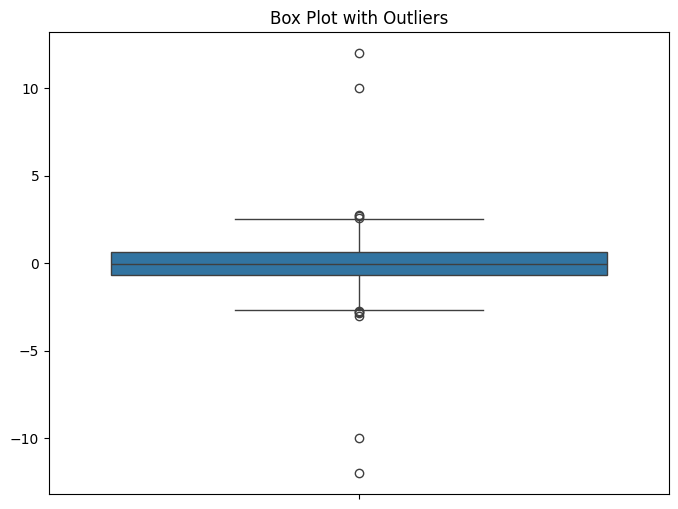

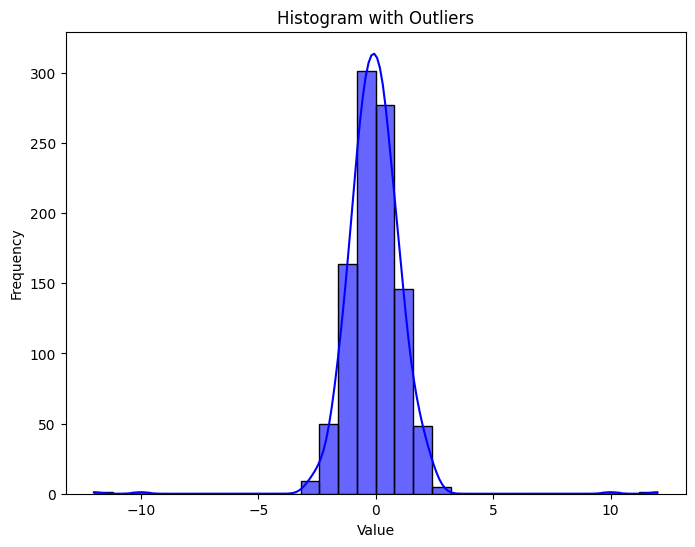

In [35]:
# Adding some outliers to the thin-tailed data
outliers = np.array([10, 12, -10, -12])
combined_data = np.concatenate([thin_tailed_data, outliers])

# Box plot with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data)
plt.title("Box Plot with Outliers")
plt.show()

# Histogram with outliers
plt.figure(figsize=(8, 6))
sns.histplot(combined_data, bins=30, kde=True, color='blue', alpha=0.6)
plt.title("Histogram with Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

### 4.6. Unnormalized Data

In [36]:
showDisplay(4.6)

- **Purpose:** Demonstrate the effects of unnormalized data on visualizations.

- **Exponential Distribution:**

<IPython.core.display.Math object>

where \(\lambda\) is the rate parameter.

- **Visualization Impact:** Skewness and long tails can distort the interpretation of central tendency and dispersion.

Understanding these concepts is crucial for accurate data representation.

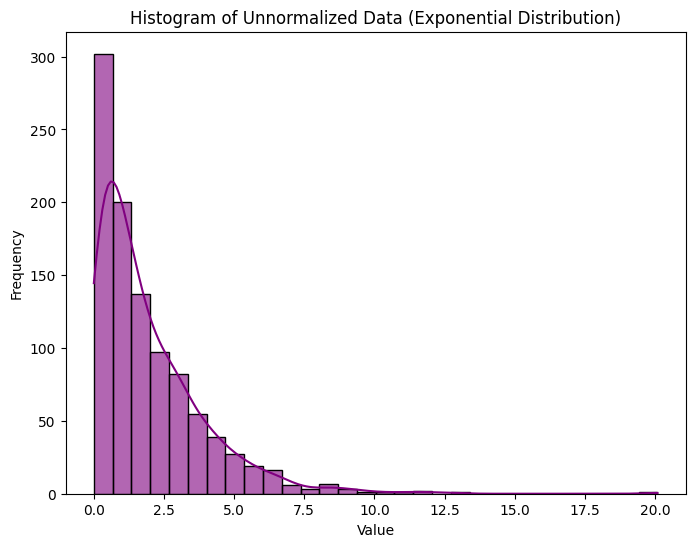

In [37]:
# Generate unnormalized data
unnormalized_data = np.random.exponential(scale=2, size=1000)

# Histogram of unnormalized data
plt.figure(figsize=(8, 6))
sns.histplot(unnormalized_data, bins=30, kde=True, color='purple', alpha=0.6)
plt.title("Histogram of Unnormalized Data (Exponential Distribution)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()